# Project Module 4

# Machine Learning Module

<img src = 'ML.png'>

## Data Preprocessing

Load the Iris dataset.

In [3]:
from sklearn.datasets import load_iris
iris = load_iris() 

In [4]:
import pandas as pd 
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [5]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Split the dataset into features and target variables.

In [6]:
df['target'] = iris.target

In [7]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [8]:
# Features
X = iris.data
# Target variable
y = iris.target

Check for missing values and handle them if any

In [9]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


Perform data exploration and visualization.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns 

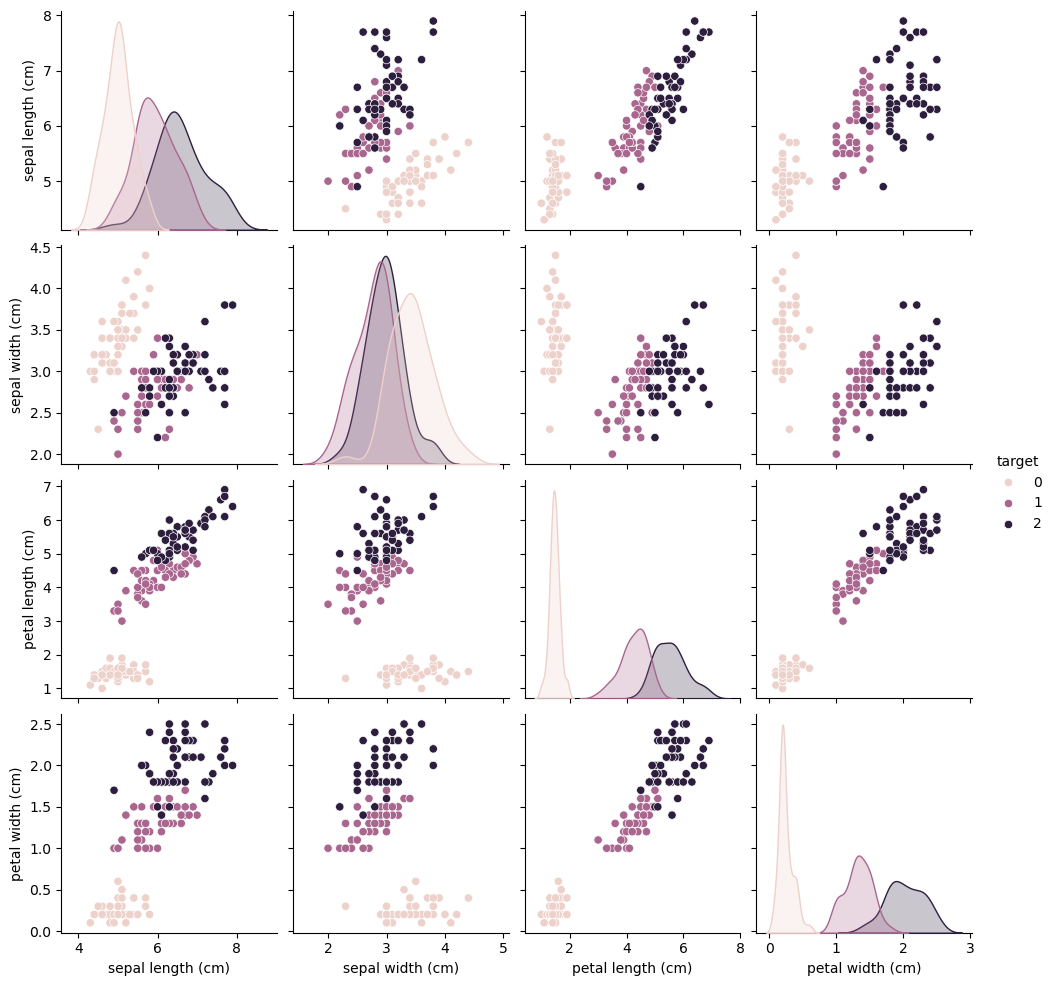

In [14]:
sns.pairplot(df, hue='target');

Text(0.5, 1.0, 'Correlation Heatmap')

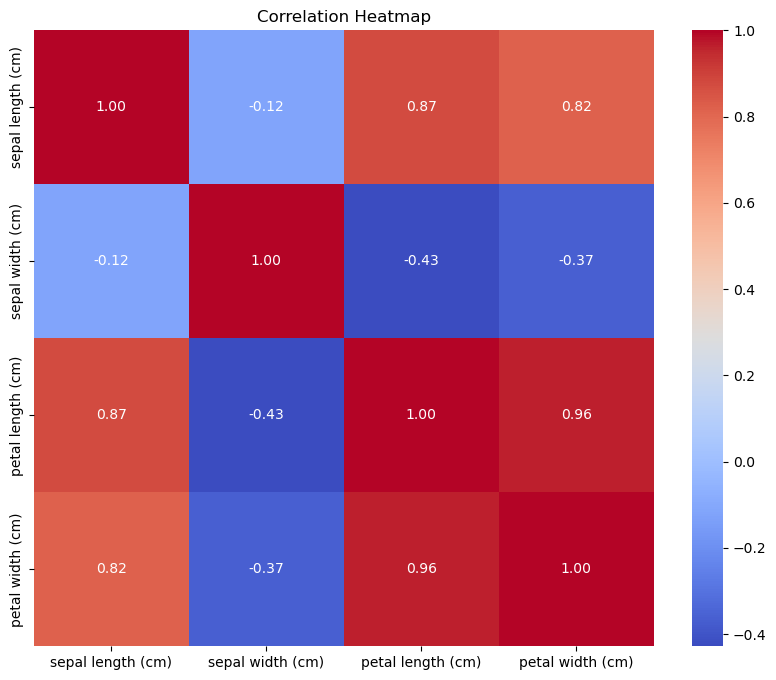

In [15]:
df2 = df.drop(columns=['target'])
# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

## Unsupervised Learning: Clustering and Outlier Detection 

In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [60]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
# Initialize KMeans with the number of clusters (k) set to 3
kmeans = KMeans(n_clusters=3, random_state=42)

In [62]:
# Fit KMeans to the scaled data
kmeans.fit(X_scaled)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Get the cluster labels for each data point
labels = kmeans.labels_

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


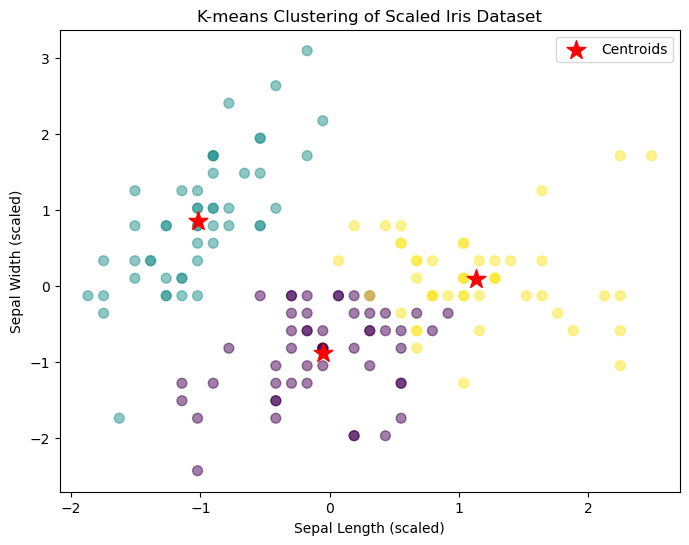

In [63]:
# Plotting the clusters
plt.figure(figsize=(8, 6))

# Scatter plot for the first two features (sepal length and sepal width)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', s=200, label='Centroids')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('K-means Clustering of Scaled Iris Dataset')
plt.legend()

In [86]:
from sklearn.cluster import DBSCAN

## Supervised Learning: Baseline Model 

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split ,cross_val_score

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
dec = DecisionTreeClassifier()
dec.fit(X_train , y_train)

DecisionTreeClassifier()

In [17]:
y_pred = dec.predict(X_test)

In [18]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [19]:
cv_scores = cross_val_score(dec, X, y, cv=3)

In [20]:
cv_scores

array([0.98, 0.94, 0.98])

In [21]:
cv_scores.mean()

0.9666666666666667

In [22]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 1.0


## Model Comparison

In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
# Define classifiers
classifiers = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [26]:
# Define evaluation metrics
metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1-score": f1_score
}

In [27]:
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=3)
    print(f"{name} - Cross-validation scores:", scores)
    print(f"{name} - Average Cross-validation score:", scores.mean())
    print()

SVM - Cross-validation scores: [0.96 0.98 0.94]
SVM - Average Cross-validation score: 0.96

Random Forest - Cross-validation scores: [0.98 0.94 0.98]
Random Forest - Average Cross-validation score: 0.9666666666666667

Gradient Boosting - Cross-validation scores: [0.98 0.94 0.98]
Gradient Boosting - Average Cross-validation score: 0.9666666666666667



In [28]:
# Perform cross-validation and evaluate each classifier
for name, clf in classifiers.items():
    print(f"Evaluation metrics for {name}:")
    for metric_name, metric_func in metrics.items():
        scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')  # Using accuracy for simplicity
        print(f"{metric_name}: {scores.mean():.2f}")
    print()

Evaluation metrics for SVM:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-score: 0.97

Evaluation metrics for Random Forest:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-score: 0.97

Evaluation metrics for Gradient Boosting:
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1-score: 0.96



In [29]:
# Store performance metrics for each classifier
performance = {}

# Perform cross-validation and evaluate each classifier
for name, clf in classifiers.items():
    performance[name] = {}
    for metric_name, metric_func in metrics.items():
        scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')  # Using accuracy for simplicity
        performance[name][metric_name] = scores.mean()

# Print performance metrics for each classifier
for name, metrics_scores in performance.items():
    print(f"Evaluation metrics for {name}:")
    for metric_name, score in metrics_scores.items():
        print(f"{metric_name}: {score:.2f}")
    print()

# Find the best-performing algorithm based on the average of all evaluation metrics
best_algorithm = max(performance, key=lambda x: sum(performance[x].values()))
print(f"The best-performing algorithm is: {best_algorithm}")

Evaluation metrics for SVM:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-score: 0.97

Evaluation metrics for Random Forest:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-score: 0.97

Evaluation metrics for Gradient Boosting:
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1-score: 0.96

The best-performing algorithm is: Random Forest


## Model Tuning and Ensemble

Exhaustive Grid Search

The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter.

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier()

In [32]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [33]:
# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=1)

In [34]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [35]:
# Evaluate the model with the best hyperparameters on the testing set
best_rf_clf = grid_search.best_estimator_
y_pred = best_rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy with Best Hyperparameters:", test_accuracy)

Testing Accuracy with Best Hyperparameters: 1.0


In [36]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define a dictionary containing the classifiers and their parameter grids
classifiers = {
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    'SVM': (SVC(random_state=42), {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf', 'poly']
    }),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7]
    })
}

# Iterate over classifiers
for clf_name, (clf, param_grid) in classifiers.items():
    print(f"Hyperparameter tuning for {clf_name}:")
    
    # Instantiate GridSearchCV
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
    
    # Perform Grid Search
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)


Hyperparameter tuning for Random Forest:
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Hyperparameter tuning for SVM:
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Hyperparameter tuning for Gradient Boosting:
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [37]:
# Define a dictionary to store the tuned classifiers
tuned_classifiers = {}

# Iterate over classifiers
for clf_name, (clf, param_grid) in classifiers.items():
    print(f"Evaluating tuned {clf_name}:")
    
    # Instantiate GridSearchCV
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
    
    # Perform Grid Search
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters
    best_params = grid_search.best_params_
    
    # Store the tuned classifier
    tuned_clf = grid_search.best_estimator_
    tuned_classifiers[clf_name] = tuned_clf
    
    # Evaluate the model on the test set
    y_pred = tuned_clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy on test set: {accuracy:.4f}")

Evaluating tuned Random Forest:
Accuracy on test set: 1.0000
Evaluating tuned SVM:
Accuracy on test set: 1.0000
Evaluating tuned Gradient Boosting:
Accuracy on test set: 1.0000


In [38]:
from sklearn.ensemble import VotingClassifier

# Create a list of tuned classifiers
tuned_estimators = [(clf_name, clf) for clf_name, clf in tuned_classifiers.items()]

# Initialize the VotingClassifier with the tuned estimators
voting_clf = VotingClassifier(estimators=tuned_estimators, voting='hard')

# Train the VotingClassifier on the training data
voting_clf.fit(X_train, y_train)

# Evaluate the VotingClassifier on the test set
y_pred_voting = voting_clf.predict(X_test)

# Calculate accuracy
accuracy_voting = accuracy_score(y_test, y_pred_voting)

print(f"Accuracy of the ensemble model: {accuracy_voting:.4f}")

Accuracy of the ensemble model: 1.0000
